![logo](https://drive.google.com/uc?export=view&id=1QJ9PAT9q-Ksv_Vs_pLXtLHxjjV-9FMTz)



_Prepared by_  [**Noureldin Mohamed Abdelsalam**](mailto:s-noureldin.hamedo@zewailcity.edu.eg)

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import tensorflow as tf
import requests
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image as image_pre
from tensorflow import keras
#from google.colab import drive
from PIL import Image
from io import BytesIO
from skimage.transform import resize

import os
import random
from glob import glob
from pathlib import Path

In [ ]:
!7z e /content/drive/MyDrive/Roon/gig2/product.7z -o/content/Train_Dataset/Product



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Roon/gig2/                                           1 file, 246346527 bytes (235 MiB)

Extracting archive: /content/drive/MyDrive/Roon/gig2/product.7z
--
Path = /content/drive/MyDrive/Roon/gig2/product.7z
Type = 7z
Physical Size = 246346527
Headers Size = 28503
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      1% 47 - product/106790_large.jpg                                    2% 114 - product/1222_large.jpg                                   3% 170 - product/128331_large.jpg

In [ ]:
!7z e /content/drive/MyDrive/Roon/gig2/application.7z -o/content/Train_Dataset/Application


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/Roon/gig2/                                           1 file, 312693820 bytes (299 MiB)

Extracting archive: /content/drive/MyDrive/Roon/gig2/application.7z
--
Path = /content/drive/MyDrive/Roon/gig2/application.7z
Type = 7z
Physical Size = 312693820
Headers Size = 8715
Method = LZMA2:24
Solid = +
Blocks = 1

  0%      0% 1        0% 4 - application/131518_highres_thm.jpg                                             1% 5 - application/131520_highres.jpg                                       

In [ ]:

#Read Applications
DATASET_DIR = os.path.join("Train_Dataset", "Application")
DATASET_DIR = DATASET_DIR.replace('\\', '/')
print(DATASET_DIR)
Application_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
Application_labels = [os.path.basename(os.path.dirname(x)) for x in Application_data]
print('Application data:',len(Application_data),'images')
print(Application_data[:10])
#Read Products
DATASET_DIR = os.path.join("Train_Dataset", "Product")
DATASET_DIR = DATASET_DIR.replace('\\', '/')
print(DATASET_DIR)
Product_data = [y for x in os.walk(DATASET_DIR) for y in glob(os.path.join(x[0], '*jpg'))]
Product_labels = [os.path.basename(os.path.dirname(x)) for x in Product_data]
print('Product Data:',len(Product_data),'images')
print(Product_data[:10])


Train_Dataset/Application
Application data: 428 images
['Train_Dataset/Application/cerra7ledlightvent_cerralv_jacobseng_nj_mclarty1_highres.jpg', 'Train_Dataset/Application/lbr-application-image_02_resized.jpg', 'Train_Dataset/Application/atbm-app1.jpg', 'Train_Dataset/Application/66351_highres.jpg', 'Train_Dataset/Application/Luminis-Inline-Plaze-Bollards.jpg', 'Train_Dataset/Application/aculux-2-ny-loft_thm_2.jpg', 'Train_Dataset/Application/ldn-switchable-application_02.jpg', 'Train_Dataset/Application/Charleston-Convention-Center-10.jpg', 'Train_Dataset/Application/91335_highres.jpg', 'Train_Dataset/Application/vellumlinearsuspended_app2_large.jpg']
Train_Dataset/Product
Product Data: 1664 images
['Train_Dataset/Product/ju_201n_wh_wb.jpg', 'Train_Dataset/Product/EC-crop-008.jpg', 'Train_Dataset/Product/2gtl-2_illuminated-jpeg_thm.jpg', 'Train_Dataset/Product/2gtl-2_illuminated-jpeg_2.jpg', 'Train_Dataset/Product/ju_219_whzwh_wb.jpg', 'Train_Dataset/Product/105822_large.jpg', 'Train

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

2092 images


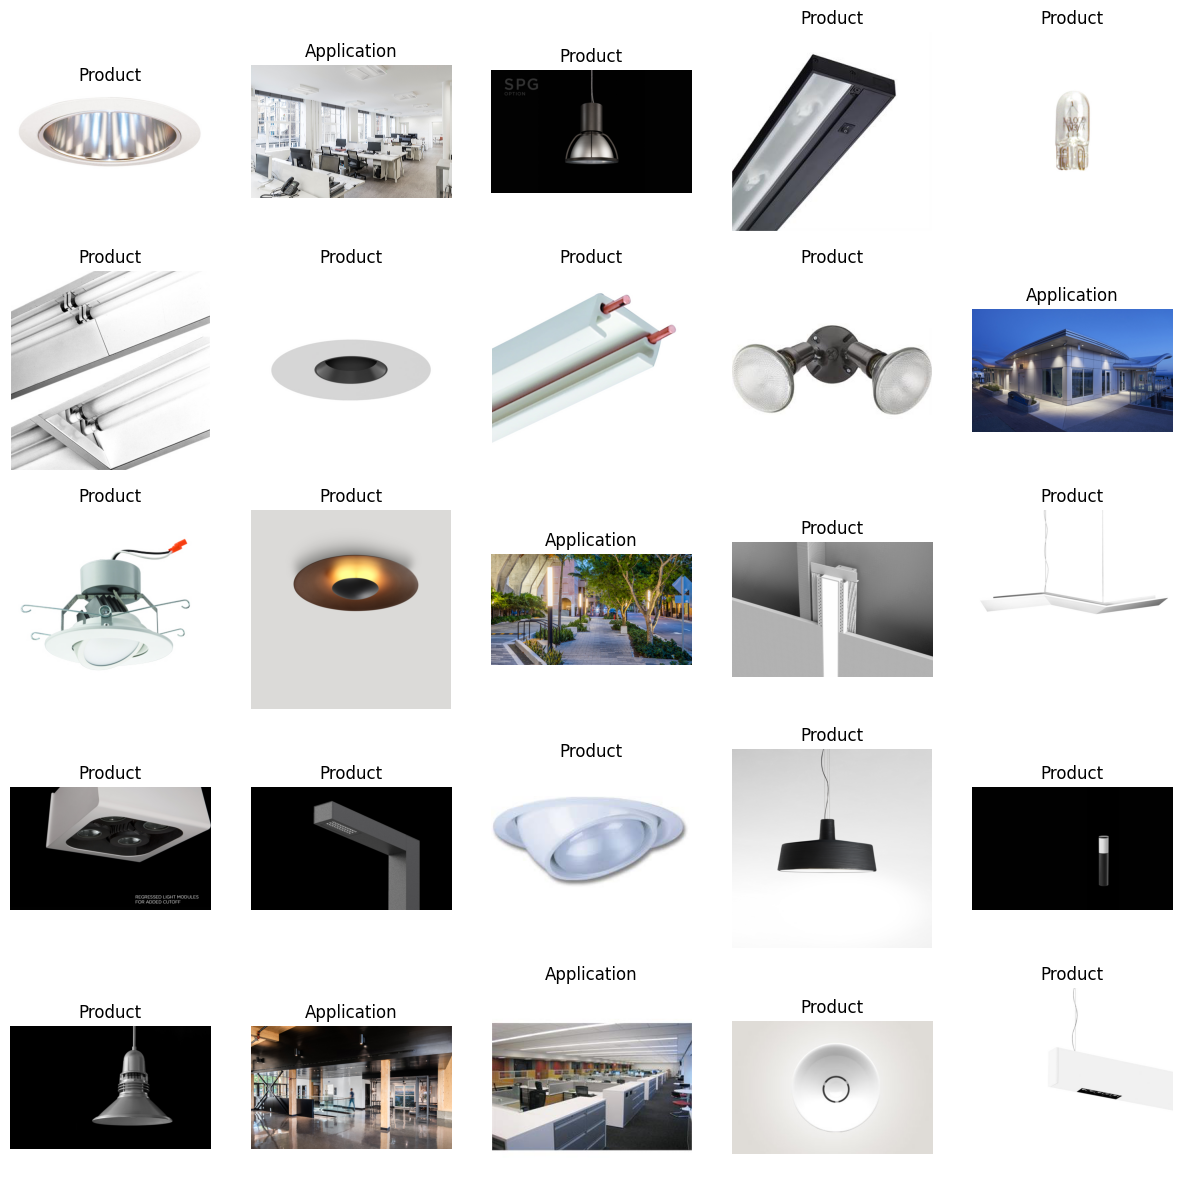

In [ ]:
all_images=Application_data+Product_data
all_labels=Application_labels+Product_labels
print(len(all_images),'images')

temp = list(zip(all_images, all_labels))
random.shuffle(temp)
all_images, all_labels = zip(*temp)

# Sample 25 images from dataset
indices = np.random.randint(0, len(all_images), size=25)
images = [all_images[i] for i in indices]
labels = [all_labels[i] for i in indices]
# Plot the 25 images
plt.figure(figsize=(15,15))
for i in range(len(indices)):
    plt.subplot(5, 5, i + 1)
    image = mpimg.imread(images[i]) # Read image from disk
    plt.imshow(image)
    plt.title(labels[i])
    plt.axis('off')

plt.show()

In [ ]:
np.ceil(len(all_images)*0.7).astype(int)
#lets split the data into train and test
temp = list(zip(all_images, all_labels))
random.shuffle(temp)
all_images, all_labels = zip(*temp)
train_data=all_images[0:np.ceil(len(all_images)*0.7).astype(int)]
train_labels=all_labels[0:np.ceil(len(all_labels)*0.7).astype(int)]
test_data=all_images[np.ceil(len(all_images)*0.7).astype(int):]
test_labels=all_labels[np.ceil(len(all_labels)*0.7).astype(int):]

In [ ]:
data_DIR = os.path.join("Data")
TESTApp_DIR=os.path.join( "Data","Test","Application")
TrainApp_DIR=os.path.join("Data","Train","Application")
TESTProd_DIR=os.path.join("Data","Test","Product")
TrainProd_DIR=os.path.join("Data","Train","Product")
Test_Dir=os.path.join("Data","Test")
Train_Dir=os.path.join("Data","Train")



In [ ]:
os.mkdir(data_DIR)
os.mkdir(Test_Dir)
os.mkdir(Train_Dir)

In [ ]:
os.mkdir(TESTApp_DIR)
os.mkdir(TrainApp_DIR)
os.mkdir(TESTProd_DIR)
os.mkdir(TrainProd_DIR)

In [ ]:
temp = list(zip(Application_data, Application_labels))
random.shuffle(temp)
Application_data, Application_labels = zip(*temp)

temp = list(zip(Product_data, Product_labels))
random.shuffle(temp)
Product_data, Product_labels = zip(*temp)

In [ ]:
np.ceil(len(Application_data))

428.0

In [ ]:
import pathlib
for count,img in enumerate(Application_data):
  _, tail = os.path.split(img)
  if(count<=np.ceil(len(Application_data)*0.7).astype(int)):
    print(img,tail)
    pathlib.Path(img).rename('Data/Train/Application/'+tail)
  else:
    print('test,,,',img,tail)
    pathlib.Path(img).rename('Data/Test/Application/'+tail)

for count,img in enumerate(Product_data):
  _, tail = os.path.split(img)
  if(count<=np.ceil(len(Product_data)*0.7).astype(int)):
    pathlib.Path(img).rename('Data/Train/Product/'+tail)
    print('test,,,',img,tail)
  else:
    pathlib.Path(img).rename('Data/Test/Product/'+tail)
    print('test,,,',img,tail)


In [ ]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import os

# Define the directories for the training data

# Define the number of images you want to add for the 'Application' class
num_images = 500

# Get a list of all the images for the 'Application' class
app_dir = os.path.join(Train_Dir, 'Application')
app_images = [os.path.join(app_dir, f) for f in os.listdir(app_dir) if f.endswith('.jpg')]

# Create a list of random indices to choose images from the 'Application' class
indices = np.random.randint(0, len(app_images), size=num_images)

# Loop through the randomly chosen images and augment them
for i in indices:
    # Open the image
    img = Image.open(app_images[i])
    img = img.convert("RGB")

    # Apply a Gaussian blur to the image
    img_blur = img.filter(ImageFilter.GaussianBlur)

    # Flip the image horizontally
    img_flip = img.transpose(method=Image.FLIP_LEFT_RIGHT)

    # Rotate the image by 90 degrees
    img_rotate = img.rotate(90)

    # Save the augmented images with new filenames
    img_blur.save(app_images[i][:-4] + '_blur.jpg')
    img_flip.save(app_images[i][:-4] + '_flip.jpg')
    img_rotate.save(app_images[i][:-4] + '_rotate.jpg')
        # Plot the original and augmented images
    fig, axes = plt.subplots(1, 4, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[1].imshow(img_blur)
    axes[1].set_title('Gaussian Blur')
    axes[2].imshow(img_flip)
    axes[2].set_title('Horizontal Flip')
    axes[3].imshow(img_rotate)
    axes[3].set_title('Rotate 90 degrees')
    plt.show()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
BATCH_SIZE = 64
HEIGHT = 200
WIDTH = 200
VAL_SPLIT = 0.2

# 1. Construct an instance of the `ImageDataGenerator` class
train_datagen =  ImageDataGenerator(
      preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
      width_shift_range=0.1,
      height_shift_range=0.1,
      rotation_range=20,
      validation_split = VAL_SPLIT
    )

# 2. Retrieve the iterator
train_generator = train_datagen.flow_from_directory(Train_Dir,
                                                    shuffle = True,
                                                    seed = 7,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical',
                                                    subset='training')

Found 1731 images belonging to 2 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    Train_Dir,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    shuffle = True,
    seed = 7,
    color_mode='rgb',
    class_mode='categorical',
    subset='validation')

Found 432 images belonging to 2 classes.


In [ ]:
# Do the same steps for the test set

# 1. Construct an instance of the `ImageDataGenerator` class
test_datagen =  ImageDataGenerator(
    preprocessing_function = tf.keras.applications.resnet50.preprocess_input
    )

# 2. Retrieve the iterator
test_generator = test_datagen.flow_from_directory(Test_Dir,
                                                    shuffle = False,
                                                    target_size=(HEIGHT, WIDTH),
                                                    batch_size=BATCH_SIZE,
                                                    color_mode='rgb',
                                                    class_mode='categorical')

Found 625 images belonging to 2 classes.


In [ ]:
class_counts = train_generator.class_indices
print(class_counts)


{'Application': 0, 'Product': 1}


In [ ]:
import os

class_counts = {}
for subdir, _, files in os.walk(train_generator.directory):
    for file in files:
        if file.endswith('.jpg'):
            class_name = os.path.basename(subdir)
            if class_name not in class_counts:
                class_counts[class_name] = 0
            class_counts[class_name] += 1

print(class_counts)


{'Product': 1166, 'Application': 997}


In [ ]:
#total_images = sum(class_counts.values())
#class_weights = {class_name: total_images / class_count for class_name, class_count in class_counts.items()}

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam



# Define the input shape of the Resnet50 model
input_shape = (224, 224, 3)

# Load the Resnet50 model
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet.summary()

# Freeze the layers in the Resnet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add a new classification layer on top of the Resnet50 model
x = resnet.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(8, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(4, activation='relu')(x)
output = Dense(2, activation='softmax')(x)

# Define the new model
model = Model(inputs=resnet.input, outputs=output)

base_learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=base_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])




Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# Convert class names to indices
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

# Calculate class weights
total_images = sum(class_counts.values())
class_weights = {0: total_images / class_counts[class_indices[0]],
                 1: total_images / class_counts[class_indices[1]]}

In [ ]:
class_weights

{0: 4.8737541528239205, 1: 1.2581475128644939}

In [ ]:
 class_counts[class_indices[1]]

1166

Epoch 1/4
28/28 [==============================] - ETA: 0s - loss: 1.2675 - accuracy: 0.5812
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
28/28 [==============================] - 81s 3s/step - loss: 1.2675 - accuracy: 0.5812 - val_loss: 0.2060 - val_accuracy: 0.9861
Epoch 2/4
28/28 [==============================] - ETA: 0s - loss: 0.5238 - accuracy: 0.8076
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
28/28 [==============================] - 78s 3s/step - loss: 0.5238 - accuracy: 0.8076 - val_loss: 0.1241 - val_accuracy: 0.9884
Epoch 3/4
28/28 [==============================] - ETA: 0s - loss: 0.3384 - accuracy: 0.9001
Epoch 3: saving model to /content/drive/MyDrive/checkpoints/cp.ckpt
28/28 [==============================] - 73s 3s/step - loss: 0.3384 - accuracy: 0.9001 - val_loss: 0.0831 - val_accuracy: 0.9884
Epoch 4/4
28/28 [==============================] - ETA: 0s - loss: 0.2620 - accuracy: 0.9249
Epoch 4: saving model to /content/dri

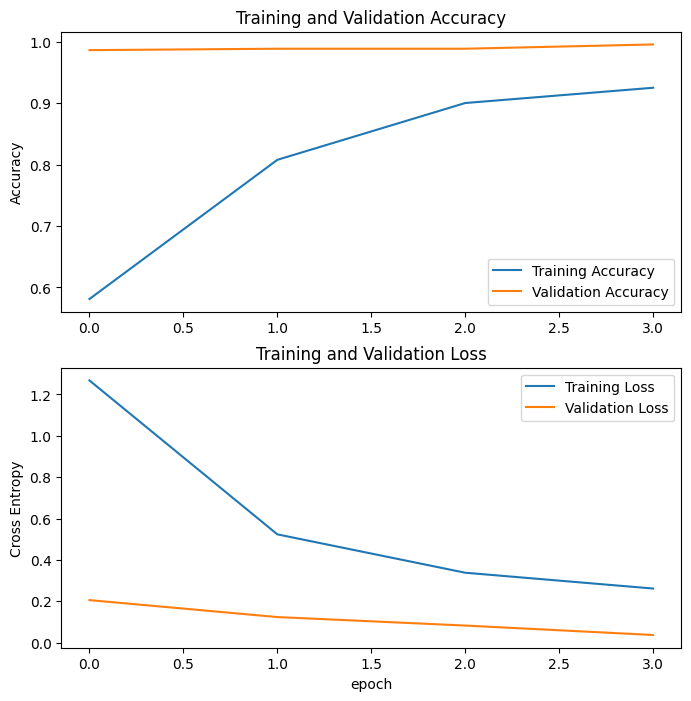

10/10 [==============================] - 18s 2s/step - loss: 0.0396 - accuracy: 0.9968


[0.039561908692121506, 0.9968000054359436]

In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='accuracy', patience=2)

# Define the checkpoint path and filename
checkpoint_path = "/content/drive/MyDrive/checkpoints/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      save_weights_only=True,
                                      verbose=1)

INITIAL_EPOCHS = 4
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=INITIAL_EPOCHS,
                    callbacks=[early_stop,checkpoint_callback],
                    )


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

# Evaluate the model on the test set
model.load_weights(checkpoint_path)  # Load the latest checkpoint
model.evaluate(test_generator)


In [ ]:
model.save('/content/drive/MyDrive/Roon/gig2/Nour4.h5')


1/1 [==============================] - 0s 24ms/step
The image contains a product


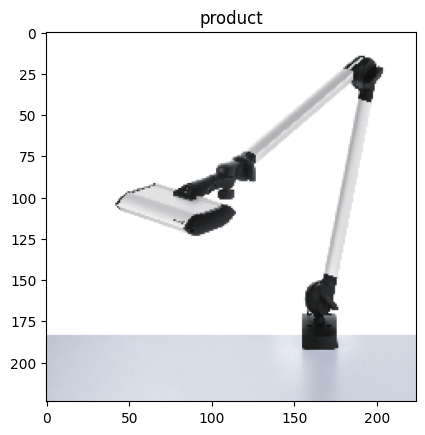

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
model.load_weights(checkpoint_path)

# Load an image to classify
img_path = '/content/HALUX_N50_temp change gallery.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

# Make a prediction
prediction = model.predict(x)

# Print the predicted class (0 = application, 1 = product)
if prediction[0][0] > prediction[0][1]:
    result = "application"
else:
    result = "product"
print("The image contains a", result)

# Display the loaded image
plt.imshow(img)
plt.title(result)
plt.show()


1/1 [==============================] - 1s 913ms/step
The image contains a application


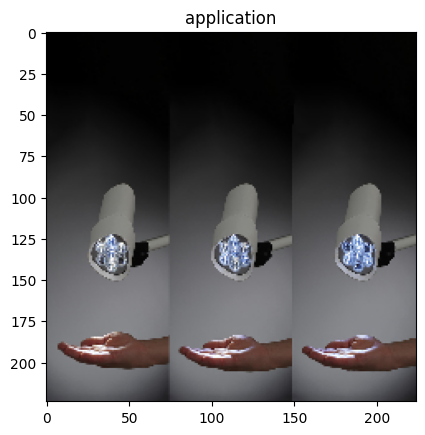

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
loaded_model = load_model('/content/drive/MyDrive/Roon/gig2/Nour4.h5')

# Load an image to classify
img_path = '/content/HALUX_N50_temp change gallery.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

# Make a prediction
prediction = loaded_model.predict(x)

# Print the predicted class (0 = application, 1 = product)
if prediction[0][0] > prediction[0][1]:
    result = "application"
else:
    result = "product"
print("The image contains a", result)

# Display the loaded image
plt.imshow(img)
plt.title(result)
plt.show()


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the trained model
model.load_weights(checkpoint_path)

# Load an image to classify
img_path = '/content/Data/Train/Application/131518_highres_flip.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.resnet50.preprocess_input(x)

# Make a prediction
prediction = model.predict(x)

# Print the predicted class (0 = application, 1 = product)
if prediction[0][0]>prediction[0][1]:
    print("The image contains an application")
else:
    print("The image contains a product")


1/1 [==============================] - 0s 25ms/step
The image contains an application


In [ ]:
prediction

array([[1.0000000e+00, 2.1346398e-13]], dtype=float32)

In [ ]:
import matplotlib.image as mpimg
from PIL import Image
img='/content/Data/Train/Application/131518_highres_flip.jpg'
image = mpimg.imread(img)
image = Image.fromarray(image)  # Convert NumPy array to PIL Image object
resized_img = np.array(image.resize((224, 224))) / 255.0
resized_img = np.expand_dims(resized_img, axis=0) # Add a batch dimension
# Make the prediction
prediction = model.predict(resized_img)
end_time = time.time()
if prediction[0][0] < prediction[0][1]:
    result = "Product Image"
else:
    result = "Application Image"

print(prediction)
print(result)

1/1 [==============================] - 0s 28ms/step
[[0.0251195 0.9748805]]
Product Image


In [ ]:
import matplotlib.image as mpimg
from PIL import Image
img='/content/Data/Test/Product/66P-X1.jpg'
image = mpimg.imread(img)
image = Image.fromarray(image)  # Convert NumPy array to PIL Image object
resized_img = np.array(image.resize((224, 224))) / 255.0
resized_img = np.expand_dims(resized_img, axis=0) # Add a batch dimension
# Make the prediction
prediction = model.predict(resized_img)
end_time = time.time()
if prediction[0][0] < prediction[0][1]:
    result = "Product Image"
else:
    result = "Application Image"

print(result)

1/1 [==============================] - 0s 24ms/step
Product Image


In [ ]:
prediction

array([[0.00632049, 0.9936795 ]], dtype=float32)

In [ ]:
model.load_weights(checkpoint_path)  # Load the latest checkpoint
model.evaluate(test_generator)

10/10 [==============================] - 14s 1s/step - loss: 0.0058 - accuracy: 0.9936


[0.005840439349412918, 0.9936000108718872]

In [ ]:
from keras.models import load_model

Nour3 = load_model('/content/drive/MyDrive/Roon/gig2/Nour3')


In [ ]:
!pip install PySimpleGUI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 15.1 MB/s eta 0:00:00
